In [3]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
# Define data filepath
pathname = './Wildfire/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [5]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYS', 'SOURCE_S_1',
       'NWCG_REPOR', 'NWCG_REP_1', 'NWCG_REP_2', 'SOURCE_REP', 'SOURCE_R_1',
       'LOCAL_FIRE', 'LOCAL_INCI', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PL',
       'ICS_209__1', 'MTBS_ID', 'MTBS_FIRE_', 'COMPLEX_NA', 'FIRE_YEAR',
       'DISCOVERY_', 'DISCOVER_1', 'DISCOVER_2', 'NWCG_CAUSE', 'NWCG_GENER',
       'NWCG_CAU_1', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_', 'LATITUDE', 'LONGITUDE', 'OWNER_DESC', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

# Question 1 (20 points):

Write a script (either in Spyder or as a Jupyter Notebook) to answer the following questions:

a) Which county had the most human caused wildfires >50 acres? (HINT: use the FIPS_NAME column)

b) Which month had the most natural caused wildfires >100 acres?

c) How many fires >200 acres have an undetermined cause (e.g. Missing data/not specified/undetermined?

d) What is the name, date, and county of the largest sized fire?

e) How many wildfires in Lane County were >50 acres?

Remember, focus on adapting the example code rather than writing your own from scratch.

# A

In [6]:

df_o50 = df[df['FIRE_SIZE'] > 50]
df_o50
df_hco50 = df_o50[df_o50['NWCG_CAUSE'] == 'Human']
df_hco50

county_df_hco50 = df_hco50.groupby("FIPS_NAME").count()
county_df_hco50
sort_county = county_df_hco50.sort_values(by = "OBJECTID", ascending = False)
sort_county




,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,geometry
FIPS_NAME,,,,,,,,,,,,,,,,,,,,,
Wasco County,71,71,71,71,71,71,71,71,71,71,...,55,71,71,71,71,71,71,71,71,71
Malheur County,49,49,49,49,49,49,49,49,49,49,...,48,49,49,49,49,49,49,49,49,49
Douglas County,40,40,40,40,40,40,40,40,40,40,...,25,40,40,40,40,40,40,40,40,40
Umatilla County,40,40,40,40,40,40,40,40,40,40,...,16,40,40,40,40,40,40,40,40,40
Klamath County,34,34,34,34,34,34,34,34,34,34,...,17,34,34,34,34,34,34,34,34,34
Harney County,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
Jefferson County,30,30,30,30,30,30,30,30,30,30,...,26,30,30,30,30,30,30,30,30,30
Wheeler County,28,28,28,28,28,28,28,28,28,28,...,17,28,28,28,28,28,28,28,28,28
Grant County,28,28,28,28,28,28,28,28,28,28,...,11,28,28,28,28,28,28,28,28,28


The answer is Wasco county

# B

In [7]:


df_o100 = df[df['FIRE_SIZE'] > 100]
df_o100
df_nc_o100 = df_o100[df_o100['NWCG_CAUSE'] == 'Natural']
df_nc_o100

datetime = pd.to_datetime(df_nc_o100['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime
df_nc_o100['datetime'] = datetime # Sorry about the warning, extra credit if someone can fix this!

large_fire_count = df_nc_o100.iloc[:,0].groupby(df_nc_o100['datetime'].dt.month).count()
large_fire_count



/Users/isaiastorres/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


datetime
4       2
5       6
6      98
7     410
8     549
9      93
10      6
Name: OBJECTID, dtype: int64

It looks like August had the most naturally caused wildfires over 100 acres.

# C

In [8]:
df_o200 = df[df['FIRE_SIZE'] > 200]
df_o200
df_ud_o200 = df_o200[df_o200['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']
df_ud_o200.count()


OBJECTID      13
FOD_ID        13
FPA_ID        13
SOURCE_SYS    13
SOURCE_S_1    13
NWCG_REPOR    13
NWCG_REP_1    13
NWCG_REP_2    13
SOURCE_REP    13
SOURCE_R_1    13
LOCAL_FIRE     0
LOCAL_INCI     5
FIRE_CODE      8
FIRE_NAME     13
ICS_209_PL    10
ICS_209__1     0
MTBS_ID        3
MTBS_FIRE_     3
COMPLEX_NA     0
FIRE_YEAR     13
DISCOVERY_    13
DISCOVER_1    13
DISCOVER_2    11
NWCG_CAUSE    13
NWCG_GENER    13
NWCG_CAU_1     0
CONT_DATE      7
CONT_DOY       7
CONT_TIME      6
FIRE_SIZE     13
FIRE_SIZE_    13
LATITUDE      13
LONGITUDE     13
OWNER_DESC    13
STATE         13
COUNTY         9
FIPS_CODE      9
FIPS_NAME      9
geometry      13
dtype: int64

There was 13 fires over 200 acres had an undetermined cause.

# D

In [9]:
size = df.sort_values(by = "FIRE_SIZE", ascending = False)
size

datetime = pd.to_datetime(size['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')

size['datetime'] = datetime 

size
#size_date = size[size['datetime']].count()
#size_date

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry,datetime
66964,1578392.0,201508655,W-649635,FED,DOI-WFMI,BLM,USORVAD,Vale District,ORVAD,Vale District,...,G,42.391894,-117.893687,BLM,OR,Malheur,41045,Malheur County,POINT (-117.89369 42.39189),2012-07-08
65681,153681.0,155225,FS-382506,FED,FS-FIRESTAT,FS,USORRSF,Rogue River-Siskiyou National Forest,0611,Siskiyou National Forest,...,G,42.038889,-123.911667,USFS,OR,None,None,None,POINT (-123.91167 42.03889),2002-07-13
47561,1733723.0,300024929,W-676717,FED,DOI-WFMI,BLM,USORVAD,Vale District,ORVAD,Vale District,...,G,43.328300,-118.224400,BLM,OR,Malheur,41045,Malheur County,POINT (-118.22440 43.32830),2014-07-14
60566,1887267.0,400008336,FS-6842387,FED,FS-FIRESTAT,FS,USORRSF,Rogue River-Siskiyou National Forest,0610,Rogue River-Siskiyou National Forest,...,G,42.296667,-123.953611,USFS,OR,015,41015,Curry County,POINT (-123.95361 42.29667),2017-07-12
66542,1577909.0,201508153,W-648062,FED,DOI-WFMI,BLM,USORBUD,Burns District,ORBUD,Burns District,...,G,42.818600,-119.175000,BLM,OR,Harney,41025,Harney County,POINT (-119.17500 42.81860),2012-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19238,759240.0,861169,ODF-11419,NONFED,ST-ORORS,ST/C&L,USOR952S,John Day Unit,ORODF-952,John Day Unit,...,A,44.657890,-119.492890,PRIVATE,OR,12,41023,Grant County,POINT (-119.49289 44.65789),1995-09-03
17897,772073.0,874740,ODF-76975,NONFED,ST-ORORS,ST/C&L,USOR771S,East Lane Unit - ODF,ORODF-771,East Lane Unit,...,A,44.071500,-122.958330,PRIVATE,OR,20,41039,Lane County,POINT (-122.95833 44.07150),2006-07-04
6319,769744.0,872104,ODF-67571,NONFED,ST-ORORS,ST/C&L,USOR973S,Pendleton Unit,ORODF-973,Pendleton Unit,...,A,45.125310,-118.939360,PRIVATE,OR,30,41059,Umatilla County,POINT (-118.93936 45.12531),2003-08-04
17895,772071.0,874738,ODF-76779,NONFED,ST-ORORS,ST/C&L,USOR771S,East Lane Unit - ODF,ORODF-771,East Lane Unit,...,A,44.070670,-122.942000,PRIVATE,OR,20,41039,Lane County,POINT (-122.94200 44.07067),2006-08-02


In [10]:
size_name = size["FIRE_NAME"].head()

size_name

66964           LONG DRAW
65681             BISCUIT
47561         SADDLE DRAW
60566          CHETCO BAR
66542    MILLER HOMESTEAD
Name: FIRE_NAME, dtype: object

Malheur county, 2012-07-08, Fire Name: Long Draw

# E

In [11]:
df_lco50 = df_o50[df_o50['FIPS_NAME'] == 'Lane County']
df_lco50

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
16668,1904575.0,400026134,W-696965,FED,DOI-WFMI,BLM,USORNOD,Northwest Oregon District,OREUD,Eugene District,...,191.00,D,44.234400,-123.426900,BLM,OR,Lane,41039,Lane County,POINT (-123.42690 44.23440)
16673,1726152.0,300005534,FS-1527915,FED,FS-FIRESTAT,FS,USORSUF,Siuslaw National Forest,0612,Siuslaw National Forest,...,80.50,C,44.243333,-123.861667,STATE OR PRIVATE,OR,Lane,41039,Lane County,POINT (-123.86167 44.24333)
17286,806186.0,913289,ODF-79990,NONFED,ST-ORORS,ST/C&L,USOR781S,Western Lane District,ORODF-781,Western Lane District,...,60.25,C,44.130280,-123.529720,PRIVATE,OR,20,41039,Lane County,POINT (-123.52972 44.13028)
17334,806205.0,913310,ODF-79910,NONFED,ST-ORORS,ST/C&L,USOR781S,Western Lane District,ORODF-781,Western Lane District,...,105.00,D,44.170560,-123.530280,PRIVATE,OR,20,41039,Lane County,POINT (-123.53028 44.17056)
17977,1647170.0,201777437,W-658467,FED,DOI-WFMI,BLM,USORNOD,Northwest Oregon District,OREUD,Eugene District,...,119.00,D,44.056720,-123.200690,BLM,OR,Lane,41039,Lane County,POINT (-123.20069 44.05672)
26154,1887596.0,400008667,FS-6826426,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,199.00,D,44.425556,-121.916667,USFS,OR,039,41039,Lane County,POINT (-121.91667 44.42556)
27184,1181356.0,1433549,FS-1491869,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,3454.00,F,44.269444,-121.908611,USFS,OR,039,41039,Lane County,POINT (-121.90861 44.26944)
27772,1887545.0,400008616,FS-6826364,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,18086.00,G,44.100556,-121.909167,USFS,OR,039,41039,Lane County,POINT (-121.90917 44.10056)
27773,1887539.0,400008610,FS-6809532,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,3575.00,F,44.100833,-121.994722,USFS,OR,039,41039,Lane County,POINT (-121.99472 44.10083)
27795,1888765.0,400009850,FS-6826413,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,3587.00,F,44.128889,-122.096667,USFS,OR,039,41039,Lane County,POINT (-122.09667 44.12889)


In [12]:
lccount = df_lco50.count()
lccount

OBJECTID      33
FOD_ID        33
FPA_ID        33
SOURCE_SYS    33
SOURCE_S_1    33
NWCG_REPOR    33
NWCG_REP_1    33
NWCG_REP_2    33
SOURCE_REP    33
SOURCE_R_1    33
LOCAL_FIRE    27
LOCAL_INCI    25
FIRE_CODE     27
FIRE_NAME     33
ICS_209_PL    24
ICS_209__1     8
MTBS_ID       12
MTBS_FIRE_    12
COMPLEX_NA    12
FIRE_YEAR     33
DISCOVERY_    33
DISCOVER_1    33
DISCOVER_2    28
NWCG_CAUSE    33
NWCG_GENER    33
NWCG_CAU_1     0
CONT_DATE     24
CONT_DOY      24
CONT_TIME     19
FIRE_SIZE     33
FIRE_SIZE_    33
LATITUDE      33
LONGITUDE     33
OWNER_DESC    33
STATE         33
COUNTY        33
FIPS_CODE     33
FIPS_NAME     33
geometry      33
dtype: int64

There were 33 wildfires in Lane County over 50 acres.

# Part 2

* a) Write a script (either in Spyder or as a Jupyter Notebook) to produce your own chloropleth map for a city, county or state showing a Census variable (or derived variable) of your choice. Consider choosing a place or variable that inetrests you.

Note that:
* If your map represents a state, use county level data
* If your map represents a county or city, use tract level data

The following table provides a list of Census variables: https://api.census.gov/data/2019/acs/acs5/variables.html



In [13]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt


In [14]:
# Define product
acs = products.ACS(2019)
acs.filter_tables('POPULATION', by='description')
acs.filter_variables('B01003')

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B01003_001E,Estimate!!Total,TOTAL POPULATION,int,B01003,0,NaN,"B01003_001EA,B01003_001M,B01003_001MA",NaN


In [15]:
sf_med_income = products.ACS(2019).from_place('San Francisco,CA', level='tract',
                                        variables=['B06011_001E']) # don't worry about the deprecation message!

/Users/isaiastorres/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/isaiastorres/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Matched: San Francisco,CA to San Francisco city within layer Incorporated Places


/Users/isaiastorres/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/isaiastorres/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/d5/tmpksq6j3hzcvyl9hmbzxbx00000gn/T/ipykernel_63307/3097445770.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  sf_med_income = produc

<AxesSubplot:>

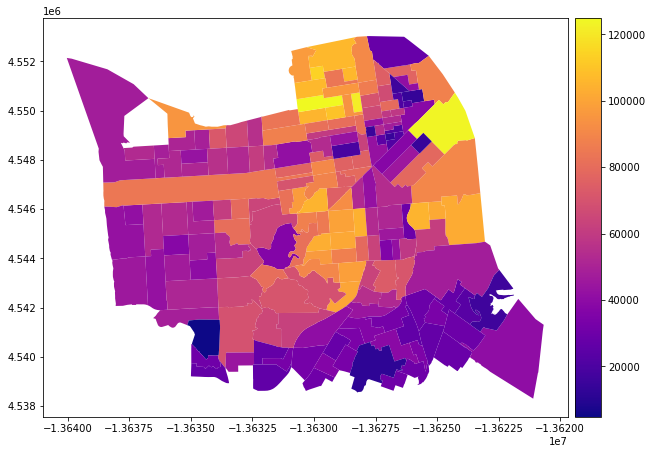

In [17]:
sf_med_income['B06011_001E'].describe()
sf_med_income['median_income'] = sf_med_income['B06011_001E']
f, ax = plt.subplots(1, 1, figsize=(10,10))

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sf_med_income.plot('B06011_001E',legend = True, ax=ax, cmap='plasma', cax =cax)
